# Proyek Analisis Data: [Bike-sharing-dataset]
- **Nama:** Muhammad Firdaus
- **Email:** firdauspdr20@gmail.com
- **ID Dicoding:** MC211D5Y2137

## Menentukan Pertanyaan Bisnis

*   Apakah ada pengaruh hari libur dengan jumlah peminjaman sepeda ?
*    Bagaimana pola penyewaan sepeda berdasarkan jam dalam sehari?

## Import Semua Packages/Library yang Digunakan

**▶ Mengimpor segala library yang akan digunakan dalam analisis data ini**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

**▶ Menghubungkan drive dengan colab, supaya file yang akan digunakan yang disimpan di drive bisa digunakan**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Wrangling

### Gathering Data

**Tabel Day**

**▶ Memuat dataset**
- code ini digunakan untuk membaca file csv yang sudah disimpan di drive, kemudian menampilkan 5 baris pertama untuk melihat struktur data nya


In [ ]:
day_df = pd.read_csv('/content/drive/MyDrive/Bike-sharing-dataset/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**▶ Hasil:**
- Dataset menampilkan 5 baris pertama dari keseluruhan struktur data yang ada

**▶ Menampilkan jumlah baris & kolom**

In [ ]:
print('Jumlah baris & kolom: ', day_df.shape)

Jumlah baris & kolom:  (731, 16)


▶Keterangan:
- Jumlah baris & kolom dari tabel day ialah:
  - **731** baris & **16** kolom

**Tabel Hour**

**▶ Memuat dataset**
- code ini digunakan untuk membaca file csv yang sudah disimpan di drive, kemudian menampilkan 5 baris pertama untuk melihat struktur data nya

In [ ]:
hour_df = pd.read_csv('/content/drive/MyDrive/Bike-sharing-dataset/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**▶ Hasil:**
- Menampilkan 5 baris pertama dari keseluruhan struktur data yang ada

**▶ Menampilkan jumlah baris & kolom yang ada**

In [ ]:
print('Jumlah baris & kolom: ', hour_df.shape)

Jumlah baris & kolom:  (17379, 17)


▶Keterangan:
- Jumlah baris & kolom dari tabel hour ialah:
  - **17379** baris & **17** kolom

**▶ Insight:**
- Sumber data:
  - Dataset ini berasal dari file **Bike Sharing Dataset** yang disimpan di Google Drive dan di load menggunakan `pd.read_csv`
  - Dataset yang digunakan ialah:
    - `day.csv` -> berisi mengenai data harian penggunaan sepeda
    - `hour.csv` -> berisi mengenai penggunaan sepeda per jam
- Struktur data:
  - Data memiliki jumlah baris & kolom yang dicek menggunakan `.shape` guna membantu mengetahui ukuran dataset sebelum dianalisa lebih jauh
  -informasi umum dataset diperiksa menggunakan .info(), yang menunjukkan **tipe data** dari setiap kolom
  

### Assessing Data

**Tabel Day**

**▶ Memeriksa struktur data**

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**▶ Keterangan:**
- kolom `dteday` masih dalam format **'object'**, sebaiknya diubah ke **'datetime'** untuk analisis waktu
- kolom `season`, `yr`, `mnth`, `holiday`, `weekday`, `workingday`, `weathersit` masih dalam format **'integer'** sebaiknya diubah ke '**category'**

**▶ Mengecek missing value**

In [ ]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


**▶ Keterangan:**
- Tidak ada missing value pada dataset ini

**▶ Mengecek duplikasi data**

In [ ]:
day_df.drop_duplicates(inplace=True)
print('Jumlah duplikat: ', day_df.duplicated().sum())
day_df.describe()

Jumlah duplikat:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**▶ Keterangan:**
- Tidak adanya duplikasi data di dataset ini

**Tabel Hour**

**▶ Memeriksa struktur data**

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


▶ Keterngan:
- kolom `dteday` masih dalam format **'object'**, sebaiknya diubah ke **'datetime'** untuk analisis waktu
- kolom `season`, `yr`, `mnth`, `hr`, `holiday`, `weekday`, `workingday`, `weathersit` masih dalam format **'integer'** sebaiknya diubah ke '**category'**

**▶ Mengecek missing value**

In [ ]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


**▶ Keterangan:**
- Tidak ada missing value di dataset ini

▶ Mengecek duplikasi data:

In [ ]:
hour_df.drop_duplicates(inplace=True)
print('Jumlah duplikat: ', hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikat:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**▶ Keterangan:**
- tidak adanya duplikasi data di dataset ini

Insight:
- Struktur Data
  - Dataset `day_df` (data harian) & `hour_df` (per jam) tidak memiliki missing value, sehingga tidak perlu dilakukan cleaning
  - beberapa kolom seperti tanggal (`dteday`) masih dalam format **object**, sebaiknya dilakukan konversi ke tipedata **datetime**
  - untuk kolom di tabel `day_df` (`season`, `yr`, `mnth`,  `holiday`, `weekday`, `workingsit`, `weathersit`) masih bertipe **int** sebaiknya dilakukan konversi ke tipedata **category** untuk lebih efisien
  - untuk di tabel `hour_df` sama seperti tabel `day_df`, hanya saja ada tambahan tabel yang harus di konversi menjadi **category** yaitu `hr`
- Pengecekan Duplikasi
  - meskipun data tidak mempunyai duplikasi tetap harus dicek terlebih dahulu untuk hal yang lebih pasti & hasilnya tetap `tidak ditemukan duplikasi`

### Cleaning Data

**Tabel Day**

▶ Mengubah kolom `dteday` yang sebelumnya bertipe data **'object'** menjadi **'datetime'**

In [ ]:
datetime_columns = ['dteday']
for column in datetime_columns:
    day_df[column] = pd.to_datetime(day_df[column])

▶ Mengubah kolom `season`, `yr`, `mnth`, `holiday`, `weekday`, `workingday`, `weathersit` yang sebelumnya bertipe data **'integer'** menjadi **'category'**

In [ ]:
category_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
for column in category_columns:
    day_df[column] = day_df[column].astype('category')

**▶ Memeriksa kembali struktur data:**
- sekarang semua tipe data sudah sesuai

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    category      
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(7), datetime64

**Tabel Hour**

▶ Mengubah kolom **`dteday`** yang sebelumnya bertipe data **'object'** menjadi **'datetime'**

In [ ]:
datetime_columns = ['dteday']
for column in datetime_columns:
    hour_df[column] = pd.to_datetime(hour_df[column])

▶ Mengubah kolom `season`, `yr`, `mnth`, `hr`, `holiday`, `weekday`, `workingday`, `weathersit` yang sebelumnya bertipe data **'integer'** menjadi **'category'**

In [ ]:
category_columns = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
for column in category_columns:
    hour_df[column] = hour_df[column].astype('category')

▶ Memeriksa kembali struktur data:
- sekarang semua tipe data sudah sesuai

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  category      
 4   mnth        17379 non-null  category      
 5   hr          17379 non-null  category      
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Insight:
- Konversi format tanggal (**datetime**):
  - Kolom `dteday` di `day_df` & `hour_df` di konversi ke **datetime** untuk mempermudah analisis berbasis waktu
- Konversi kolom **category**:
  - beberapa kolom di konversi ke tipe data **category** agar lebih efisien dalam penggunaan memori & memudahkan proses analisis:
    - `day_df`: `season`, `yr`, `mnth`, `holiday`, `weekday`, `workingday`, `weathersit`
    - `hour_df`: sama seperti `day_df`, hanya saja ada tambahan 1 kolom yaitu `hr`
  - hasil akhir:
    - dataset kini memiliki struktur data yang **lebih optimal** dengan tipe data yang sesuai
    - proses ini membantu dalam **pengolahan data yang lebih cepat** & **mengurangi penggunaan memori**

## Exploratory Data Analysis (EDA)

### Explore

**Tabel Day**

**▶ Menampilkan deskripsi data secara menyeluruh**

In [ ]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.0,731.0,731.0,731.0,731.0,731.0,731.0,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4.0,2.0,12.0,2.0,7.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,3.0,1.0,1.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188.0,366.0,62.0,710.0,105.0,500.0,463.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**▶ Keterangan:**
- **`dteday`** memiliki rentang waktu dari **1 Januari 2011 hingga 31 Desember 2012**.  
- **`season`, `yr`, `mnth`, `holiday`, `weekday`, `workingday`, dan `weathersit`** adalah variabel kategori dengan jumlah unik terbatas.  
- **`temp`, `atemp`, `hum`, dan `windspeed`** memiliki rentang dan distribusi yang baik tanpa nilai negatif.  
- **`cnt`** (jumlah penyewaan sepeda) memiliki rata-rata sekitar **4504** per hari dengan nilai maksimum **8714**.  

**▶ Menampilkan rata - rata jumlah penyewaan sepeda di hari libur**

In [ ]:
day_df.groupby("holiday")["cnt"].agg(['mean', 'sum'])

<ipython-input-20-f7129d53de3c>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby("holiday")["cnt"].agg(['mean', 'sum'])


,mean,sum
holiday,,
0,4527.104225,3214244
1,3735.000000,78435


**▶ Keterangan:**
- rata - rata penyewaan sepeda dihitung untuk hari libur `holiday = 1` dan hari biasa `holiday = 0`
- rata - rata penyewaan sepeda pada hari libur(`holiday=1`) sebanyak **4527**
- rata - rata penyewaan sepeda pada hari biasa(`holiday=0`) **sebanyak 3735**

**▶ Menampilkan statistik deskripsi untuk jumlah penyewaan sepeda**

In [ ]:
day_df["cnt"].describe()

,cnt
count,731.000000
mean,4504.348837
std,1937.211452
min,22.000000
25%,3152.000000
50%,4548.000000
75%,5956.000000
max,8714.000000


**▶ Keterangan:**
- Data terdiri dari **731** hari pencatatan
- Rata - rata jumlah penyewa sepeda per hari adalah **4504**
- Penyewaan paling sedikir terjadi sebanyak **22** & terbanyak **8174**
- **50%** (median) menunjukkan nilai **4548** mendekati rata - rata
- **25%** data terendah memiliki penyewaan sebanyak **3152** sedangkan **25%** data tertinggi sebanyak **5956**
- standar deviasi menunjukkan adanya variasi yang cukup besar dalam jumlah penyewaan sepeda setiap harinya sebesar **1973**

**Tabel Hour**

**▶ Menampilkan deskripsi data secara menyeluruh**

In [ ]:
hour_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.0,17379.0,17379.0,17379.0,17379.0,17379.0,17379.0,17379.0,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4.0,2.0,12.0,24.0,2.0,7.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,3.0,1.0,5.0,17.0,0.0,6.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496.0,8734.0,1488.0,730.0,16879.0,2512.0,11865.0,11413.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


▶ Keterangan:
- `dteday` memiliki rentang waktu dari **1 Januari 2011 - 31 Desember 2012**
- `season`, `yr`, `mnth`, `hr`, `holiday`, `weekday`, `workingday`, dan `weathersit` adalah variabel kategori dengan jumlah unik terbatas  
- **`temp`, `atemp`, `hum`, dan `windspeed`** memiliki distribusi yang baik tanpa nilai negatif
- **`cnt`** (jumlah penyewaan sepeda per jam) memiliki rata-rata sekitar **189** dengan nilai maksimum **977**

▶ Analisis pola penyewaan sepeda berdasarkan jam dalam sehari

In [ ]:
hour_df.groupby(['hr', 'workingday'])['cnt'].mean().unstack()

<ipython-input-23-6a141f145084>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby(['hr', 'workingday'])['cnt'].mean().unstack()


workingday,0,1
hr,,
0,90.800000,36.786290
1,69.508696,16.552632
2,53.171053,8.683778
3,25.775330,4.942553
4,8.264317,5.429787
5,8.689189,24.913131
6,18.742358,102.500000
7,43.406926,290.612903
8,105.653680,477.006048


▶ Keterangan:
- Pola penyewaan sepeda cenderung meningkat pada **pagi hari (sekitar jam 7-9) dan sore hari (jam 17-19) pada hari kerja**, yang kemungkinan besar berhubungan dengan aktivitas berangkat dan pulang kerja.  
- Pada **hari libur**, pola penyewaan terlihat lebih merata sepanjang hari, dengan puncak yang lebih cenderung terjadi di siang dan sore hari.  
- Perbedaan pola ini menunjukkan bahwa **sepeda digunakan sebagai transportasi utama pada hari kerja, sementara pada hari libur lebih banyak digunakan untuk rekreasi / jalan - jalan**

▶ Menentukan waktu dalam sehari berdasarkan kolom **hr** (jam), kemudian menghitung rata-rata jumlah penyewaan sepeda untuk setiap kategori waktu

In [ ]:
def time_of_day(hour):
    if 6 <= hour < 12:
        return "Pagi"
    elif 11 <= hour < 16:
        return "Siang"
    elif 16 <= hour < 19:
        return "Sore"
    else:
        return "Malam"

hour_df["time_of_day"] = hour_df["hr"].apply(time_of_day)

hour_df.groupby("time_of_day")["cnt"].mean().reindex(["Pagi", "Siang", "Sore", "Malam"])

,cnt
time_of_day,
Pagi,208.100688
Siang,249.788679
Sore,399.625229
Malam,98.894138


▶ Keterangan:
- **Pagi hari (06:00 - 11:59)** memiliki rata-rata **208 sepeda/jam**
- **Siang hari (11:00 - 15:59)** memiliki rata-rata **249 sepeda/jam**, menunjukkan aktivitas yang masih cukup tinggi
- **Sore hari (16:00 - 18:59)** memiliki rata-rata penyewaan tertinggi (**399 sepeda/jam**)
- **Malam hari (19:00 - 05:59)** memiliki jumlah penyewaan terendah (**98 sepeda/jam**)

**Insight:**
- Distribusi umum penyewaan sepeda `describe()`
  - Dataset mencakup berbagai informasi terkait penyewaan sepeda, termasuk jumlah total penyewaan (`cnt`) tetapi ada kemungkinan **outlier** terutama pada jam / hari tertentu dengan penyewaan yang sangat tinggi atau rendah
- Pengaruh hari libur terhadap penyewaan sepeda
  - rata - rata penyewaan lebih rendah pada `hari libur` dibanding `hari kerja`
  - Namun, total jumlah penyewaan pada hari libur **masih cukup signifikan*, yang menandakan penggunaan sepeda untuk aktivitas santai / rekreasi
  - hari ini menunjukkan bahwa meskipun penyewaan utama terjadi pada `hari kerja`, ada pola penggunaan berbeda di hari libur.
- Pola penyewaan sepeda berdasarkan jam (`hour_df`):
  - hari Kerja:
    - Penyewaan mengalami dua puncak utama:
      - pagi hari (07:00 - 09:00)
      - sore hari (17:00 - 19:00)
    - Hal ini menunjukkan sepeda digunakan sebagai transportasi utama untuk berangkat & pulang kerja/sekolah
  - hari libur:
    - Pola penyewaan lebih merata sepanjang hari, dengan kenaikan signifikan di siang & sore hari
    - Ini mengindikasikan bahwa sepeda lebih sering digunakan untuk aktivitas santai / rekreasi saja
- Penyewaan sepeda berdasarkan waktu dalam sehari:
  - pagi (06:00 - 11:59): Penyewaan tinggi di hari kerja karena faktor berangkat kerja/sekolah
  - siang (12:00 - 15:59): penyewaan stabil & lebih tinggi di hari libur
  - sore (16:00 - 18:59): puncak tertinggi, terutama saat pulang kerja/sekolah
  - malam (19:00 - 05:59): penyewaan rendah, sepda jarang digunakan pada malam hari
- Kesimpulan:
  - Hari kerja memiliki jumlah penyewaan lebih tinggi dibandingkan hari libur
  - Puncak penyewaan terjadi pada jam sibuk (pagi&sore) di hari kerja, sementara hari libur merata dengan puncak di siang & sore hari
  - sepeda lebih sering digunakan sebagai transportasi pada hari kerja, tetapi juga populer untuk rekreasi di akhir pekan


## Visualization & Explanatory Analysis

### Pertanyaan 1 (Apakah ada pengaruh hari libur dengan jumlah peminjaman sepeda ?):

▶ Membuat visualisasi pengaruh `hari libur` terhadap jumlah peminjaman sepeda menggunakan **barplot**

<ipython-input-25-b302322a1464>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  holiday_avg = day_df.groupby("holiday")["cnt"].mean().reset_index()
<ipython-input-25-b302322a1464>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=holiday_avg['holiday'], y=holiday_avg['cnt'], palette=['#1f77b4', '#ff7f0e'])


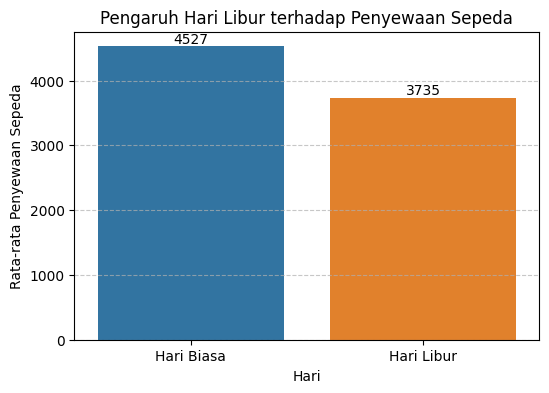

In [ ]:
plt.figure(figsize=(6, 4))
holiday_avg = day_df.groupby("holiday")["cnt"].mean().reset_index()

ax = sns.barplot(x=holiday_avg['holiday'], y=holiday_avg['cnt'], palette=['#1f77b4', '#ff7f0e'])
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')

plt.xticks([0, 1], ['Hari Biasa', 'Hari Libur'])
plt.xlabel('Hari')
plt.ylabel('Rata-rata Penyewaan Sepeda')
plt.title('Pengaruh Hari Libur terhadap Penyewaan Sepeda')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

▶ Explanatory Analysis (Pengaruh hari libur terhadap penyewaan sepeda)
- Penyewaan sepeda lebih tinggi pada `hari biasa` dibandingkan `hari libur`, dengan rata - rata sekitar **4.527** penyewaan pada `hari biasa` & **3.375** penyewaan pada `hari libur`
- Penurunan penyewaan pada `hari libur` bisa disebabkan oleh berkurangnya mobilitas pekerja & pelajar yang menggunakan sepeda sebagai sarana transportasi harian
- Meskipun lebih rendah, penyewaan di `hari libur` tetap cukup signifikan. Kemungkinan karena adanya aktivitas rekreasi atau olahraga yang memanfaatkan sepeda
- Potensi strategi untuk meningkatkan penyewaan di `hari libur`:
  - meningkatkan promosi / diskon di akhir pekan
  - menyediakan layanan sewa sepeda untuk wisata / kegiatan acara tertentu

### Pertanyaan 2 (Bagaimana pola penyewaan sepeda berdasarkan jam dalam sehari?):

▶ Visualisasi pola penyewaan sepeda berdasarkan jam dalam sehari?

<ipython-input-26-f94f17789fac>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hourly_rentals = hour_df.groupby("hr")["cnt"].mean().reset_index()


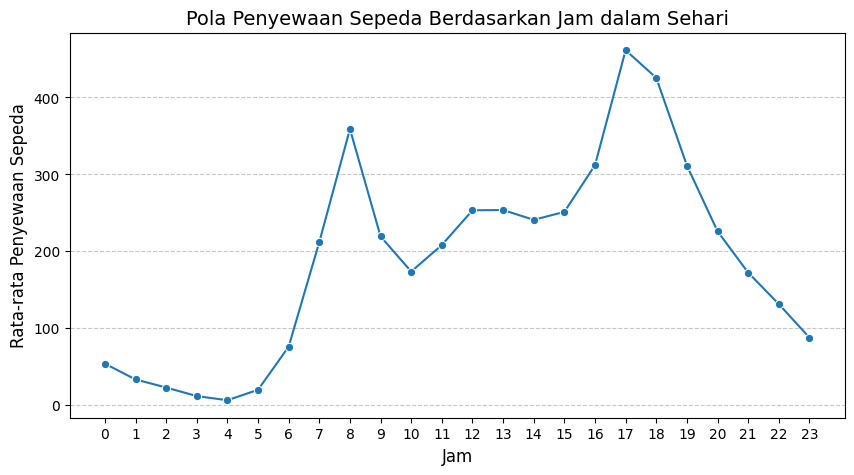

In [ ]:
hourly_rentals = hour_df.groupby("hr")["cnt"].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(x=hourly_rentals["hr"], y=hourly_rentals["cnt"], marker="o", color="#1f77b4")

plt.title("Pola Penyewaan Sepeda Berdasarkan Jam dalam Sehari", fontsize=14)
plt.xlabel("Jam", fontsize=12)
plt.ylabel("Rata-rata Penyewaan Sepeda", fontsize=12)
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

▶ Explanatory Analysis (**Pola penyewaan sepeda berdasarkan jam dalam sehari**)

- Puncak penyewaan pada jam sibuk:
  - Dari hasil visualisasi, terlihat bahwa jumlah penyewaan sepeda meningkat tajam pada 2 periode utama, yaitu pagi hari (`07:00-09:00`) & sore hari (17:00 - 19:00)
  - Ini mencerminkan kebiasaan masyarakat yang menggunakan sepeda sebagai modal transportasi untuk pergi & pulang kerja / sekolah
- Penurunan Aktivitas di siang & malam hari:
  - setelah jam sibuk pagi, jumlah penyewaan menurun mulai dari jam `10:00-16:00`, kemungkinan karena banyak orang sudah berada di tempat kerja / sekolah
  - setelah jam `20:00`, jumlah penyewaan kembali turun drastis, menunjukkan bahwa penggunaan sepeda pada malam hari sangat rendah karena banyak orang yang sudah beristirahat
- Strategi bisnis:
  - **Optimasi Jumlah Sepeda**: dengan memahami pola ini, perusahaan dapat meningkatkan jumlah sepeda yang tersedia pada jam sibuk & mengurangi jumlah sepeda yang tidak digunakan di luar jam sibuk
  - **Strategi Harga Dinamis**: harga untuk penyewaan bisa lebih disesuaikan, misal tarif lebih tinggi saat jam sibuk & buat promo / diskon saat jam sepi untuk menarik lebih banyak pengguna
  - **Peningkatan Layanan**: menyediakan beberapa layanan tambahan seperti parkir strategis atau perawatan ekstra pada sepeda di jam sibuk, hal itu dapat meningkatkan kepuasan pelanggan

### ▶ Insight dari analisis 2 pertanyaan bisnis

- Pengaruh hari libur terhatap penyewaan sepeda
  - penyewaan sepeda lebih tinggi pada `hari biasa` dibandingkan `hari libur`
  - rata - rata penyewaan **4.527** sepeda/hari pada `hari biasa`, sedangkan **3.735** sepeda/hari pada `hari libur`
  - kemungkinan penyebab:
    - sepeda digunakan sebagai transportasi utama oleh pekerja/pelajar di `hari biasa`
    - pada `hari libur` mobilitas turun, sehingga penyewaan juga berkurang
  - peluang bisnis:
    - melakukan promosi khusus saat hari libur untuk meningkatkan penyewaan
    - menyediakan paket wisata / event khusus yang melibatkan penyewaan sepeda
- Pola penyewaan sepeda berdasarkan jam dalam sehari
  - 2 puncak utama penyewaan sepeda:
    - pagi (`07:00-09:00`) -> pengguna pergi ke kantor/sekolah
    - sore (`17:00`-`19:00`) -> pengguna pulang kerja/sekolah
  - waktu penyewaan sepi:
    - siang (`10:00-16:00`) -> kebanyakan orang sudah di kantor/sekolah
    - malam (`20:00-ke atas`) -> mobilitas menurun drastis karena sudah jam nya istirahat
  - peluang bisnis:
    - **optimasi jumlah sepeda**: menyediakan lebih banyak sepeda di jam sibuk & kurangin di jam sepi
    - **strategi harga dinamis**: tarif lebih tinggi di jam sibuk & diskon di saat jam sepi untuk menarik pelanggan
    - **layanan  tambahan**: parkir sepeda gratis atau perawatan untuk memastikan kualitas layanan tetap tinggi di jam sibuk
- Kesimpulan:
  - penyewaan sepeda lebih tinggi pada hari biasa karena kebutuhan transportasi, sementara hari libur lebih fokus pada rekreasi. Pola penggunaan menunjukkan puncak pada jam sibuk pagi & sore.
  - strategi optimalisasi:
    - promosi khusus di hari libur
    - penyesuaian jumlah sepeda berdasarkan jam sibuk/sepi
    - strategi harga dinamis untuk meningkatkan keuntungan
    - layanan tambahan untuk meningkatkan pengalaman pelanggan
  

# Conclusion

- **Conclusion pertanyaan 1:**
  - kesimpulan:
    - Dari analisis data, terlihat bahwa jumlah peminjaman sepeda lebih tinggi pada `hari kerja` dibanding `hari libur`
    - rata - rata peminjaman pada `hari kerja` sekitar **4.527** penyewaan, sedangkan pada `hari libur` hanya `3.375` penyewaan
    - hal ini kemungkinan besar disebabkan oleh **penggunaan sepeda sebagai sarana transportasi harian** oleh para pekerja & pelajar, yang lebih aktif pada `hari kerja`
    - meskipun lebih rendah, peminjaman pada hari libur tetap cukup signifikan, kemungkinan karena **aktivitas rekreasi / jalan-jalan**
  - saran bisnis:
    - meningkatkan promosi pada hari libur untuk menarik lebih banyak pelanggan
    - menyediakan layanan sewa sepeda yang menarik bagi wisatawan / komunitas olahraga



- **Conclusion pertanyaan 2:**
  - Kesimpulan:
    - peminjaman sepeda menunjukkan pola yang jelas dengan **2 puncak utama**:
      - pagi (`07:00-09:00`): puncak pertama saat orang berangkat kerja/sekolah
      - sore (`17:00-19:00`): puncak kedua saat orang pulang kerja/sekolah
    - setelah jam `09:00`, peminjaman turun dan tetap rendah sepanjang siang, menunjukkan bahwa banyak pengguna telah tiba di tempat tujuan
    - setelah jam `20:00`, peminjaman turun dratis, menunjukkan sedikitnya penggunaan sepeda karena orang sudah beristirahat
  - saran bisnis:
    - optimasi jumlah sepeda: pastikan sepeda lebih banyak di jam sibuk
    - strategi harga dinamis: naikkan harga sewa di jam sibuk & buat promos/diskon di jam sepi untuk menarik lebih banyak pengguna
    - peningkatan layanan: menyediakan parkir sepeda gratis atau perawatan ekstra saat jam sibuk untuk meningkatkan kepuasan pelanggan

In [ ]:
all_df = pd.concat([day_df, hour_df], ignore_index=True)
all_df.to_csv("all_data.csv", index=False)